In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Training Batch Gradient Descent SVC on Linear data set (iris petal length,petal width)
from sklearn.datasets import load_iris
X=load_iris()['data'][:,(2,3)]
y=(load_iris()['target']==2).astype(np.float64).reshape(-1,1)

In [3]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        self.C = C
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # Random initialization
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) # n feature weights
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        X_t = X * t
        self.Js=[]

        # Training
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -C * np.sum(t_sv)
                
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])
        self.coef_ = np.array([w])
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

C=2
svm_clf = MyLinearSVC(C=C, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)
svm_clf.predict(np.array([[5, 2], [4, 1]]))

array([[ 1.],
       [ 0.]])

[0, 60000, 0, 100]

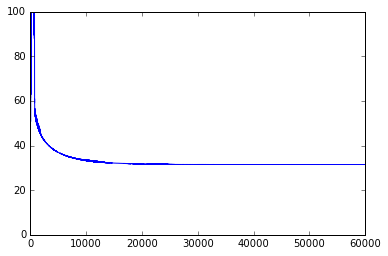

In [4]:
plt.plot(range(svm_clf.n_epochs),svm_clf.Js)
plt.axis([0,svm_clf.n_epochs,0,100])


In [5]:
print(svm_clf.coef_)

[[[ 2.28129013]
  [ 2.71597487]]]


In [6]:
from sklearn.svm import SVC

In [7]:
svc_mod=SVC(C=C,kernel='linear')
svc_mod.fit(X,y.ravel())

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
svc_mod.predict(np.array([[5, 2], [4, 1]]))

array([ 1.,  0.])

In [9]:
svc_mod.coef_

array([[ 2.27128546,  2.71287145]])

In [10]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

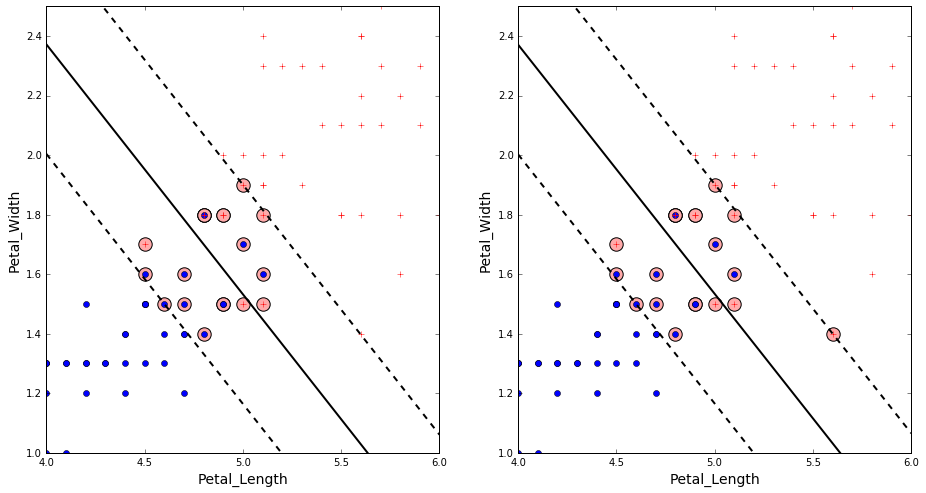

In [11]:
plt.figure(figsize=(15.5,8))
plt.subplot(121)
ys=y.ravel()
plt.plot(X[:,0][ys==0],X[:,1][ys==0],'bo')#not virginical
plt.plot(X[:,0][ys==1],X[:,1][ys==1],'r+')#virginica
plt.xlabel('Petal_Length',fontsize=14)
plt.ylabel('Petal_Width',fontsize=14)
plt.xlim(4,6)
plt.ylim(1,2.5)
plot_svc_decision_boundary(svm_clf,4,6)
plt.subplot(122)
ys=y.ravel()
plt.plot(X[:,0][ys==0],X[:,1][ys==0],'bo')#not virginical
plt.plot(X[:,0][ys==1],X[:,1][ys==1],'r+')#virginica
plt.xlabel('Petal_Length',fontsize=14)
plt.ylabel('Petal_Width',fontsize=14)
plt.xlim(4,6)
plt.ylim(1,2.5)
plot_svc_decision_boundary(svc_mod,4,6)


In [12]:
X=load_iris()['data'][:,(2,3)]
y=load_iris()['target']
index_s_v=(y==0) | (y==1)
X=X[index_s_v]
y=y[index_s_v]

In [13]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


In [14]:
C=5
alpha=1/(C*len(X))
mod_lin=LinearSVC(loss='hinge',C=C)
mod_svc=SVC(C=C,kernel='linear')
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                    n_iter=100000, epsilon=-np.infty, random_state=42)


In [15]:
from sklearn.preprocessing import StandardScaler
sc_mod=StandardScaler()
X_scaled=sc_mod.fit_transform(X)

In [16]:
mod_lin.fit(X_scaled, y)
mod_svc.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)



print("LinearSVC:                   ", mod_lin.intercept_, mod_lin.coef_)
print("SVC:                         ", mod_svc.intercept_, mod_svc.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [ 0.28480975] [[ 1.05542643  1.09851984]]
SVC:                          [ 0.31933577] [[ 1.1223101   1.02531081]]
SGDClassifier(alpha=0.00200): [ 0.32] [[ 1.12293103  1.02620763]]


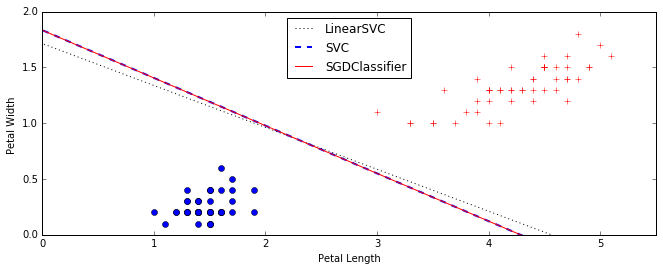

In [32]:
plt.figure(figsize=(11, 4))
plt.plot(X[:,0][y==0],X[:,1][y==0],'bo')
plt.plot(X[:,0][y==1],X[:,1][y==1],'r+')
#decision Boundary
w1 = -mod_lin.coef_[0, 0]/mod_lin.coef_[0, 1]
b1 = -mod_lin.intercept_[0]/mod_lin.coef_[0, 1]
w2 = -mod_svc.coef_[0, 0]/mod_svc.coef_[0, 1]
b2 = -mod_svc.intercept_[0]/mod_svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

line1 = sc_mod.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = sc_mod.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = sc_mod.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.axis([0,5.5,0,2])
plt.legend(loc='upper center')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width ')

array([ 0.28480975])